In [1]:
from IPython.display import display

# LCPB 21-22 Exercise 4, XGBoost

## Group 2221: Alessandro Maria Capodaglio, Sarvenaz Babakhani, Reza Rajaee, Elham Khosravi

#### For clarity the final results are detailed in this notebook, whereas the final code is available in the other uploaded files. 


## 1.
### a) Comparing the accuracy of a CNN with that of an XGBoost model in the limit of small datasets. 

As suggested in the assignment descriptio we tried datasets of sizes 
* N = [20,50,100,150,200,250,300,400,500]

Our procedure was as follows: 
1. For each of the dataset sizes listed train both models; 
2. Evaluate the test accuracies of the models;
3. Repeat the two steps above for a total of 20 times.

Step 3 was done in order to get an idea of the variability in performance of the models, i.e. it allowed us to plot the accuracies for each size of the dataset with statistical confidence. The values reported in the plot below correspond to the mean of 20 different runs, the errors bars are the standard deviation of the found values.
As the dataset becomes bigger the error becomes smaller, since the particular method is more consistent between runs.
The found values are reported in the plot below (for a full display of the code-base which made this part possible refer to the notebooks **CNN_different_sizes.ipynb** and **xgb_timeseries_diffN.ipynb**). 




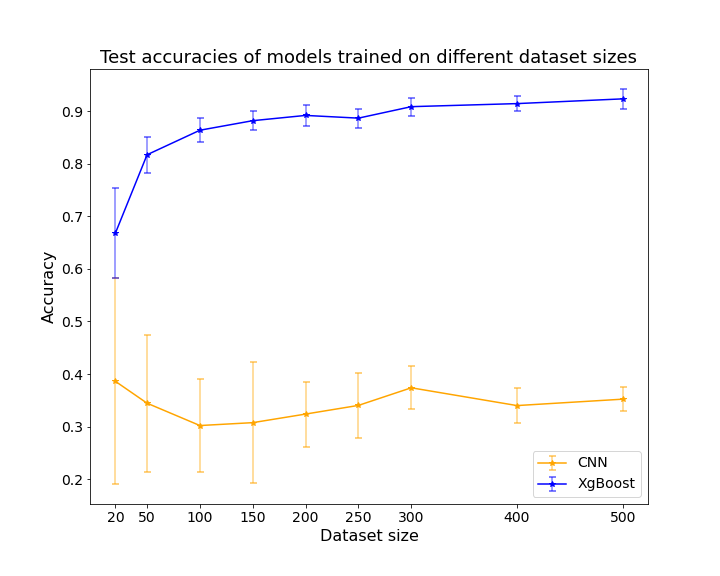

In [2]:
from IPython import display
display.Image(filename = 'CNN_vs_XgBoost.png')

As can be seen XGBoost does indeed perform better for any size dataset, whereas the CNN leaves a lot to be desidered (its accuracy is very close to a random **1/3** guess, making it a useless model).

### b) For task a) we have seen during the lesson that XGBoost finds some features more relevant than others. Find the description of those features in the documentation and try to provide an explanation of why they are relevant for that problem.

As we can see (refer to the notebook **xgb_timeseries_diffN.ipynb**) for smaller dataset sizes the most relevant features are different between the various dataset sizes. By increasing the number of samples, the number of unique most effective features decreases.

The most relevant features are the following:<br>

* **value__change_quantiles__f_agg_"mean"** <br>

Calculating the mean of the absolute change of the time series inside a corridor(given by the quantiles ql and qh of the distribution of x)<br>

* **value__change_quantiles__f_agg_"var"** <br>

Calculating the mean of the absolute change of the time series inside above-mentioned corridor.

* **value__agg_linear_trend__attr_"stderr"** <br>

Standard error of a linear least-squares regression for values of the time series that were aggregated over chunks versus the sequence from 0 up to the number of chunks minus one.

The reason that this is relevant for the problem is that: There are three labels, each representing three different functions: a linear function and two different quadratic functions.<br> 
The standard error of a linear least-squares regression (feature 3) will be different for each of the labels because they are from 3 completely different functions. Also, the mean and variance (features 1,2) of the data can provide us with the appropriate information to identify the label.






## 2.

### For the labeling of simple two dimensional data (as the one generated during the lesson, try different parameters (gamma, lambda, n_estimators,...) aiming to find the simplest yet effective XGBoost model that keeps a good accuracy.

For this study we decided to approach the problem in an _incremental_ way. What this means is that we proceeded step by step in optimizing the parameters, instead of doing a brute grid search, given that for this particular task it would have taken a long time. <br>
(for a full display of the codebase used refer to the notebook **xgb_fit(best result).ipynb**)

### The following cell shows the model treated during the lectures.

The mean squared error of the model treated during the lectures is 143.33 and its validation accuracy was found to be 0.98.

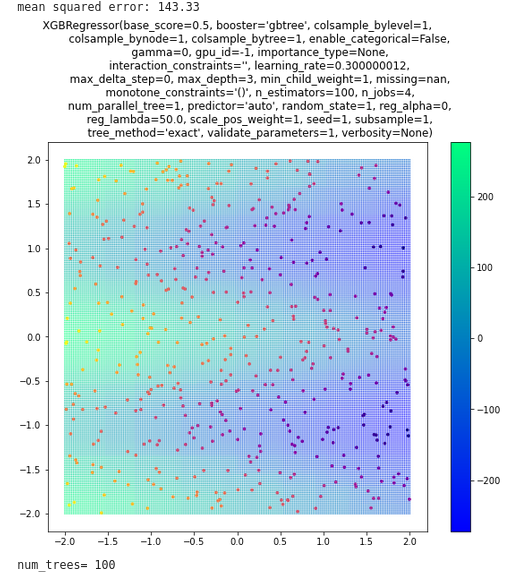

In [3]:
from IPython import display
display.Image(filename = 'oldmodel.png')

### The following cell shows the model that we have constructed.

The mean squared error of the model found by our step by step optimization procedure is 32.34 and its validation accuracy was found to be 0.9998. It is to be noted that a better model with a higher number of estimators could have been found, however we decided to keep the model simple, and cap the number of estimators at 500. The number of estimators was found to be the most influential parameter in the search of a good performing model. As a curiosity we decided to also find a better performing model with the number of estimators capped at 100, and a better model than the one seen during the lectures was indeed found

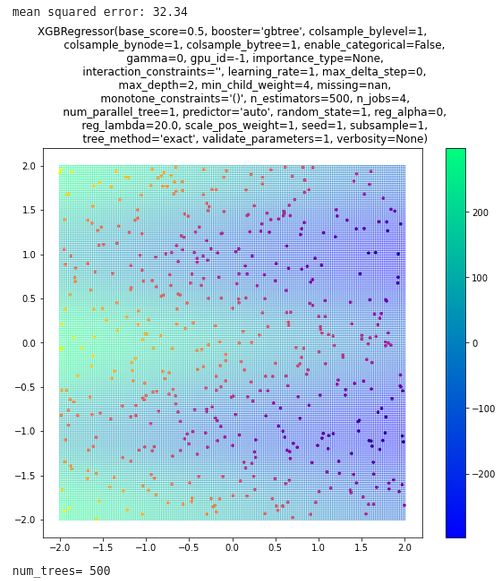

In [4]:
from IPython import display
display.Image(filename = 'bestresult.png')

### N_estimators capped at 100

The mean squared error for this model was found to be 57.69. 

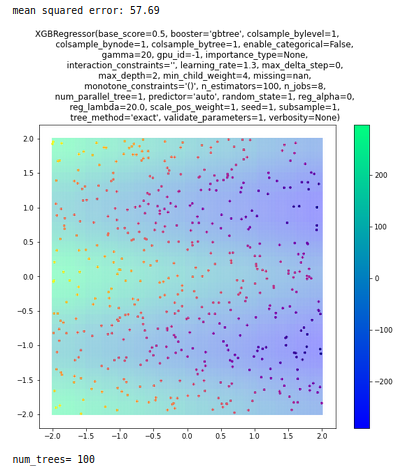

In [5]:
from IPython import display
display.Image(filename = '100estimators_best_fit.png')